In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
mode_rating=df['Rating'].mode()[0]

In [5]:
df['Rating']=df['Rating'].replace({np.NAN:mode_rating})

In [6]:
df['Rating']=df['Rating'].astype('int32')

In [7]:
df[df['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
df['Reviews'].replace('3.0M',3000000,inplace=True)

In [9]:
df['Reviews']=df['Reviews'].astype('int32')

In [10]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [11]:
list=[]
for i in df['Size']:
    if 'M' in i:
        i=i.replace('M','')
        i=float(i)
        i=i*1000000
        list.append(i)

    elif 'k' in i:
        i=i.replace('k','')
        i=float(i)
        i=i*10000
        list.append(i)
    elif '+' in i:
        i=i.replace('+','')
        if ',' in i:
            i=i.replace(',','')
            i=float(i)
            list.append(i)    
    elif ',' in i:
        i=i.replace(',','')
        i=float(i)
        list.append(i)
    else:
        list.append(i)


In [12]:
df['Size']=list

In [13]:
Size_mean=round((df[df['Size']!='Varies with device']['Size']).mean(),2)

In [14]:
df['Size']=df['Size'].replace('Varies with device',Size_mean)

In [15]:
df[df['Installs']=='Free']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19,3000000,1000.0,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
df.drop(index=10472,axis=0,inplace=True)

In [17]:
list_1=[]
for i in df['Installs']:
    i=i.replace('+','')
    i=i.replace(',','')
    i=int(i)
    list_1.append(i)


In [18]:
df['Installs']=list_1

In [19]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [20]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [21]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [22]:
df['Type'].mode()

0    Free
dtype: object

In [23]:
df['Type'].isnull().sum()

1

In [24]:
df['Type']=df['Type'].replace({np.NaN:'Free'})

In [25]:
df_paid=pd.get_dummies(df['Type'],drop_first=True)

In [26]:
df=pd.concat([df,df_paid],axis=1)

In [27]:
df.drop(columns='Type',inplace=True)

In [28]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Paid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000000.0,10000,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3,967,14000000.0,500000,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0


In [29]:
df['Price']=df['Price'].apply(lambda x : x.replace('$','') )

In [30]:
df['Price']=df['Price'].apply(lambda x : float(x))

In [31]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [32]:
df_content_rating=pd.get_dummies(df['Content Rating'],drop_first=True,prefix='Content_Rating')

In [33]:
df=pd.concat([df,df_content_rating],axis=1)

In [34]:
df=df.drop(columns='Content Rating',axis=1)

In [35]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])

In [36]:
df['Updated_day']=df['Last Updated'].dt.day
df['Updated_month']=df['Last Updated'].dt.month
df['Updated_year']=df['Last Updated'].dt.year

In [37]:
df['Genres'].value_counts()[:27].sum()

9076

In [38]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Paid,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated,Updated_day,Updated_month,Updated_year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000000.0,10000,0.0,Art & Design,2018-01-07,1.0.0,4.0.3 and up,0,1,0,0,0,0,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3,967,14000000.0,500000,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,0,1,0,0,0,0,15,1,2018


In [39]:
df.to_csv('Playstore_Data_Clean.csv')

### EDA

In [40]:
df[df['App'].duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Paid,Content_Rating_Everyone,Content_Rating_Everyone 10+,Content_Rating_Mature 17+,Content_Rating_Teen,Content_Rating_Unrated,Updated_day,Updated_month,Updated_year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4,80805,21653971.79,5000000,0.0,Business,2018-02-26,Varies with device,4.0.3 and up,0,1,0,0,0,0,26,2,2018
236,Box,BUSINESS,4,159872,21653971.79,10000000,0.0,Business,2018-07-31,Varies with device,Varies with device,0,1,0,0,0,0,31,7,2018
239,Google My Business,BUSINESS,4,70991,21653971.79,5000000,0.0,Business,2018-07-24,2.19.0.204537701,4.4 and up,0,1,0,0,0,0,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4,31614,37000000.00,10000000,0.0,Business,2018-07-20,4.1.28165.0716,4.0 and up,0,1,0,0,0,0,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4,6989,21653971.79,1000000,0.0,Business,2018-07-16,4.3.0.508,4.4 and up,0,1,0,0,0,0,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3,1145,1400000.00,100000,0.0,Dating,2016-02-25,2.2,4.0 and up,0,0,0,1,0,0,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4,36981,4000000.00,1000000,0.0,Communication,2018-07-06,5.2,5.0 and up,0,1,0,0,0,0,6,7,2018
10730,FP Notebook,MEDICAL,4,410,60000000.00,50000,0.0,Medical,2018-03-24,2.1.0.372,4.4 and up,0,1,0,0,0,0,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4,33599,12000000.00,1000000,0.0,Shopping,2018-07-30,3.9,4.4 and up,0,1,0,0,0,0,30,7,2018


In [41]:
df.drop_duplicates(subset='App',keep='first',inplace=True)

In [42]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [43]:
df_category=pd.get_dummies(df['Category'],drop_first=True,prefix='Category')

In [44]:
df=pd.concat([df,df_category],axis=1)

In [45]:
df

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4,159,19000000.00,10000,0.0,Art & Design,2018-01-07,1.0.0,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,ART_AND_DESIGN,3,967,14000000.00,500000,0.0,Art & Design;Pretend Play,2018-01-15,2.0.0,...,0,0,0,0,0,0,0,0,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4,87510,8700000.00,5000000,0.0,Art & Design,2018-08-01,1.2.4,...,0,0,0,0,0,0,0,0,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4,215644,25000000.00,50000000,0.0,Art & Design,2018-06-08,Varies with device,...,0,0,0,0,0,0,0,0,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4,967,2800000.00,100000,0.0,Art & Design;Creativity,2018-06-20,1.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4,38,53000000.00,5000,0.0,Education,2017-07-25,1.48,...,0,0,0,0,0,0,0,0,0,0
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5,4,3600000.00,100,0.0,Education,2018-07-06,1.0,...,0,0,0,0,0,0,0,0,0,0
10838,Parkinson Exercices FR,MEDICAL,4,3,9500000.00,1000,0.0,Medical,2017-01-20,1.0,...,0,0,0,0,0,0,0,0,0,0
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4,114,21653971.79,1000,0.0,Books & Reference,2015-01-19,Varies with device,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Top 10 Categories in App')

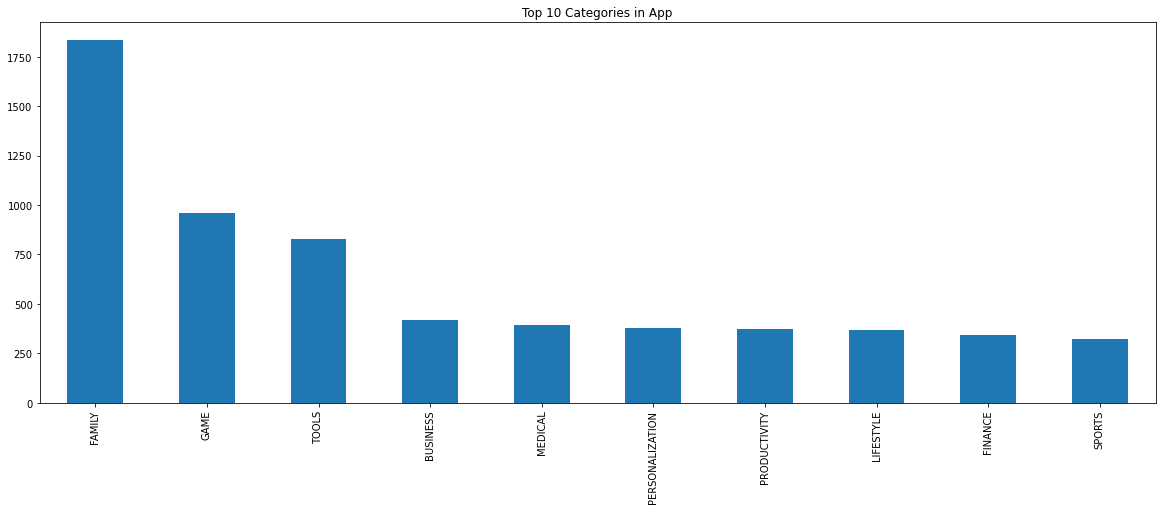

In [46]:
plt.figure(figsize=(20,7))
df['Category'].value_counts()[:10].plot(kind='bar')
plt.title('Top 10 Categories in App')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   App                           9659 non-null   object        
 1   Category                      9659 non-null   object        
 2   Rating                        9659 non-null   int32         
 3   Reviews                       9659 non-null   int32         
 4   Size                          9659 non-null   float64       
 5   Installs                      9659 non-null   int64         
 6   Price                         9659 non-null   float64       
 7   Genres                        9659 non-null   object        
 8   Last Updated                  9659 non-null   datetime64[ns]
 9   Current Ver                   9651 non-null   object        
 10  Android Ver                   9657 non-null   object        
 11  Paid                         

## Internal Assignment

Question:1 Which category has largest number of installion ?


In [48]:
df[['Category','Installs']].groupby(by='Category').sum()[:1]

,Installs
Category,
ART_AND_DESIGN,114338100


Answer : Art and Design has the largest share of Installs

Question:2 What are the top 5 most installed apps in each categories ?

In [49]:
list_3=df['Category'].unique()

In [50]:
list_3

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [51]:
dictionary={}
for i in list_3:
    App_list=df[df['Category']==i].sort_values(by='Installs',ascending=False)[:10]['App']
    dictionary[i]=App_list

In [52]:
dictionary

{'ART_AND_DESIGN': 3                                 Sketch - Draw & Paint
 42                           Textgram - write on photos
 45    Canva: Poster, banner, card maker & graphic de...
 19                                         ibis Paint X
 12                       Tattoo Name On My Photo Editor
 2     U Launcher Lite – FREE Live Cool Themes, Hide ...
 18                        FlipaClip - Cartoon animation
 37                                   Floor Plan Creator
 7                                      Infinite Painter
 8                                  Garden Coloring Book
 Name: App, dtype: object,
 'AUTO_AND_VEHICLES': 8289                        AutoScout24 - used car finder
 72          Android Auto - Maps, Media, Messaging & Voice
 70      Fines of the State Traffic Safety Inspectorate...
 69                            Used cars for sale - Trovit
 67                                     Ulysse Speedometer
 91                                                SKencar
 62      e

Question:3  How many apps are there on Google Play store which gets 5 rating ?

In [53]:
len(df[df['Rating']==5])

271

Solution : There are 271 apps which has 5 rating 